1. Problem: Product Mix Optimization

A company manufactures two products — Product A and Product B. Each product requires:

| Resource       | Product A | Product B | Available |
|----------------|-----------|-----------|-----------|
| Machine Hours  | 3 hrs     | 2 hrs     | 120 hrs   |
| Labor Hours    | 2 hrs     | 1 hr      | 100 hrs   |

- Profit per unit of Product A: ₹30  
- Profit per unit of Product B: ₹20

Goal: To determine how many units of each product to produce to maximize profit.

2. Mathematical Formulation:-

### Let:
- x = units of Product A
- y = units of Product B

**Objective Function**:  
Maximize Z = 30x + 20y

**Subject to Constraints**:  
3x + 2y ≤ 120  (Machine hours)  
2x + y ≤ 100   (Labor hours)  
x ≥ 0, y ≥ 0   (Non-negativity)

3. Python Implementation Using PuLP

In [7]:
from pulp import LpMaximize, LpProblem, LpVariable, value
from pulp import LpStatus
# Defining problem
model = LpProblem(name="product-mix", sense=LpMaximize)

# Defining variables
x = LpVariable(name="Product_A", lowBound=0, cat="Continuous")
y = LpVariable(name="Product_B", lowBound=0, cat="Continuous")

# Adding objective
model += 30 * x + 20 * y, "Total Profit"

# Adding constraints
model += (3 * x + 2 * y <= 120, "Machine Hours")
model += (2 * x + y <= 100, "Labor Hours")

# Solving
model.solve()

# Output results
print(f"Status: {LpStatus[model.status]}")
print(f"Optimal units of Product A: {x.value():.2f}")
print(f"Optimal units of Product B: {y.value():.2f}")
print(f"Maximum Profit: ₹{value(model.objective):.2f}")

Status: Optimal
Optimal units of Product A: 0.00
Optimal units of Product B: 60.00
Maximum Profit: ₹1200.00


4. Insights

- The optimal solution suggests producing X units of Product A and Y units of Product B.
- This yields a maximum profit of ₹Z.
- All constraints were respected, and no resources were over-utilized.

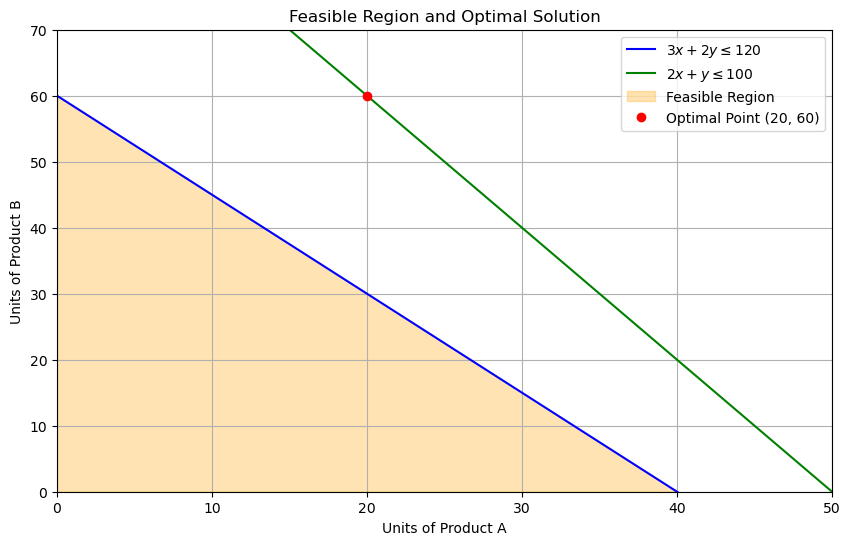

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Create a range for x values (Product A units)
x_vals = np.linspace(0, 50, 400)

# Constraint lines
y1 = (120 - 3 * x_vals) / 2     # 3x + 2y <= 120
y2 = 100 - 2 * x_vals           # 2x + y <= 100

# Plot the constraints
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y1, label=r'$3x + 2y \leq 120$', color='blue')
plt.plot(x_vals, y2, label=r'$2x + y \leq 100$', color='green')

# Fill feasible region
plt.fill_between(x_vals, np.minimum(y1, y2), 0, 
                 where=(y1 >= 0) & (y2 >= 0), color='orange', alpha=0.3, label='Feasible Region')

# Plot optimal point (based on solver output)
plt.plot(20, 60, 'ro', label='Optimal Point (20, 60)')

# Set axis labels and title
plt.xlabel('Units of Product A')
plt.ylabel('Units of Product B')
plt.title('Feasible Region and Optimal Solution')
plt.xlim((0, 50))
plt.ylim((0, 70))
plt.grid(True)
plt.legend()
plt.show()
